# Racing analysis
Formula 1 data summaries

In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)
pd.options.display.width = 0

## Step one: discover

In [4]:
drivers = pd.read_csv("/home/andy/data/drivers.csv", engine='python')

In [5]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
139,141,bailey,NaN,NaN,Julian,Bailey,09/10/1961,British,http://en.wikipedia.org/wiki/Julian_Bailey
140,142,chaves,NaN,NaN,Pedro,Chaves,27/02/1965,Portuguese,http://en.wikipedia.org/wiki/Pedro_Chaves
141,143,bartels,NaN,NaN,Michael,Bartels,08/03/1968,German,http://en.wikipedia.org/wiki/Michael_Bartels
142,144,hattori,NaN,NaN,Naoki,Hattori,13/06/1966,Japanese,http://en.wikipedia.org/wiki/Naoki_Hattori


In [6]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     144 non-null    int64  
 1   driverRef    144 non-null    object 
 2   number       8 non-null      float64
 3   code         44 non-null     object 
 4   forename     144 non-null    object 
 5   surname      144 non-null    object 
 6   dob          144 non-null    object 
 7   nationality  144 non-null    object 
 8   url          144 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.2+ KB


In [7]:
drivers.describe()

,driverId,number
count,144.000000,8.000000
mean,73.298611,27.000000
std,41.993852,31.749016
min,1.000000,5.000000
25%,37.750000,6.750000
50%,73.500000,16.500000
75%,109.250000,27.500000
max,145.000000,99.000000


## Step two: cleanse

In [8]:
print("Columns with missing values\n")

for column in drivers:
    print(column, ' : ', drivers[column].isnull().sum())

Columns with missing values

driverId  :  0
driverRef  :  0
number  :  136
code  :  100
forename  :  0
surname  :  0
dob  :  0
nationality  :  0
url  :  0


In [9]:
drivers.columns[drivers.isnull().any()]

Index(['number', 'code'], dtype='object')

In [10]:
blanks = pd.DataFrame(drivers, columns=['number', 'code', 'dob', 'url'])

In [11]:
blanks

,number,code,dob,url
0,44.0,HAM,07/01/1985,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,NaN,HEI,10/05/1977,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,6.0,ROS,27/06/1985,http://en.wikipedia.org/wiki/Nico_Rosberg
3,14.0,ALO,29/07/1981,http://en.wikipedia.org/wiki/Fernando_Alonso
4,NaN,KOV,19/10/1981,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...
139,NaN,NaN,09/10/1961,http://en.wikipedia.org/wiki/Julian_Bailey
140,NaN,NaN,27/02/1965,http://en.wikipedia.org/wiki/Pedro_Chaves
141,NaN,NaN,08/03/1968,http://en.wikipedia.org/wiki/Michael_Bartels
142,NaN,NaN,13/06/1966,http://en.wikipedia.org/wiki/Naoki_Hattori


In [12]:
print("% blank\n")
print(round((drivers.isnull().sum() * 100 / len(drivers)), 2).sort_values(
    ascending=False))

% blank

number         94.44
code           69.44
driverId        0.00
driverRef       0.00
forename        0.00
surname         0.00
dob             0.00
nationality     0.00
url             0.00
dtype: float64


hmmm... This tells me that code is not a good field on which to id a driver

In [13]:
drivers['number'] = drivers['number'].astype(str)

In [14]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,nan,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,nan,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
139,141,bailey,nan,NaN,Julian,Bailey,09/10/1961,British,http://en.wikipedia.org/wiki/Julian_Bailey
140,142,chaves,nan,NaN,Pedro,Chaves,27/02/1965,Portuguese,http://en.wikipedia.org/wiki/Pedro_Chaves
141,143,bartels,nan,NaN,Michael,Bartels,08/03/1968,German,http://en.wikipedia.org/wiki/Michael_Bartels
142,144,hattori,nan,NaN,Naoki,Hattori,13/06/1966,Japanese,http://en.wikipedia.org/wiki/Naoki_Hattori


In [15]:
nationality = drivers.groupby(['nationality'])['driverRef'].count()

In [16]:
nationality

nationality
American       2
Argentine      3
Australian     2
Austrian       6
Belgian        4
Brazilian     16
British       15
Canadian       1
Colombian      1
Czech          1
Danish         2
Dutch          4
Finnish        5
French        15
German         9
Hungarian      1
Indian         1
Irish          1
Italian       29
Japanese      13
Malaysian      1
Monegasque     1
Polish         1
Portuguese     3
Spanish        3
Swedish        1
Swiss          3
Name: driverRef, dtype: int64

In [17]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     144 non-null    int64 
 1   driverRef    144 non-null    object
 2   number       144 non-null    object
 3   code         44 non-null     object
 4   forename     144 non-null    object
 5   surname      144 non-null    object
 6   dob          144 non-null    object
 7   nationality  144 non-null    object
 8   url          144 non-null    object
dtypes: int64(1), object(8)
memory usage: 10.2+ KB


In [18]:
drivers['full_name'] = drivers['surname'] + ", " + drivers['forename']

In [19]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,full_name
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,"Hamilton, Lewis"
1,2,heidfeld,nan,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,"Heidfeld, Nick"
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg,"Rosberg, Nico"
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,"Alonso, Fernando"
4,5,kovalainen,nan,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,"Kovalainen, Heikki"
...,...,...,...,...,...,...,...,...,...,...
139,141,bailey,nan,NaN,Julian,Bailey,09/10/1961,British,http://en.wikipedia.org/wiki/Julian_Bailey,"Bailey, Julian"
140,142,chaves,nan,NaN,Pedro,Chaves,27/02/1965,Portuguese,http://en.wikipedia.org/wiki/Pedro_Chaves,"Chaves, Pedro"
141,143,bartels,nan,NaN,Michael,Bartels,08/03/1968,German,http://en.wikipedia.org/wiki/Michael_Bartels,"Bartels, Michael"
142,144,hattori,nan,NaN,Naoki,Hattori,13/06/1966,Japanese,http://en.wikipedia.org/wiki/Naoki_Hattori,"Hattori, Naoki"


## Step three: analyze

In [20]:
nationality = pd.DataFrame(
    drivers.groupby(['nationality'])[['driverRef']].count())

In [21]:
nationality

,driverRef
nationality,
American,2
Argentine,3
Australian,2
Austrian,6
Belgian,4
Brazilian,16
British,15
Canadian,1
Colombian,1


## Step four: report

In [67]:
drivers.groupby("nationality")[
    ["nationality", "driverRef", "full_name"]].apply(print)

    nationality driverRef          full_name
25     American     speed       Speed, Scott
119    American  andretti  Andretti, Michael
   nationality  driverRef           full_name
58   Argentine  mazzacane   Mazzacane, Gastin
72   Argentine      tuero      Tuero, Esteban
80   Argentine    fontana   Fontana, Norberto
   nationality driverRef       full_name
16  Australian    webber    Webber, Mark
99  Australian   brabham  Brabham, David
    nationality     driverRef             full_name
24     Austrian          wurz       Wurz, Alexander
30     Austrian         klien      Klien, Christian
38     Austrian    friesacher   Friesacher, Patrick
75     Austrian        berger       Berger, Gerhard
89     Austrian    wendlinger      Wendlinger, Karl
105    Austrian  ratzenberger  Ratzenberger, Roland
    nationality driverRef           full_name
90      Belgian    gachot    Gachot, Bertrand
111     Belgian     adams     Adams, Philippe
121     Belgian   boutsen    Boutsen, Thierry
126     Be

""


<AxesSubplot:xlabel='nationality'>

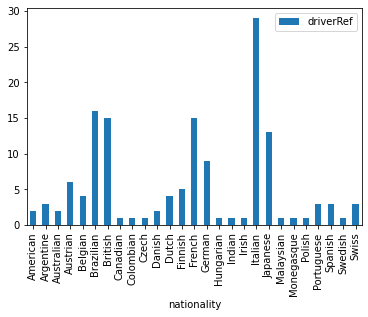

In [68]:
nationality.plot.bar()